# Data anlysis of CalcioTrend
* We are going to analyze the data of CalcioTrend

Import the libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
app = pd.read_csv("Assignment_Data/appearances.csv")
club_games = pd.read_csv("Assignment_Data/club_games.csv")
clubs = pd.read_csv("Assignment_Data/clubs.csv")
competitions = pd.read_csv("Assignment_Data/competitions.csv")
game_events = pd.read_csv("Assignment_Data/game_events.csv")
game_lineaps = pd.read_csv("Assignment_Data/game_lineups.csv")
games = pd.read_csv("Assignment_Data/games.csv")
player_valutations = pd.read_csv("Assignment_Data/player_valuations.csv")
players = pd.read_csv("Assignment_Data/players.csv")

## Data understanding

In [7]:
app.shape #Numero righe/colonne del dataset
app.head() #Primi 5 elementi del dataset
app.columns #Nome delle colonne
app.describe() #Descrizione del dataset

,game_id,player_id,player_club_id,player_current_club_id,yellow_cards,red_cards,goals,assists,minutes_played
count,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06,1.507351e+06
mean,3.014718e+06,1.798913e+05,2.881502e+03,3.638909e+03,1.490230e-01,3.827244e-03,9.635778e-02,7.431050e-02,6.964984e+01
std,5.570794e+05,1.652259e+05,7.113885e+03,9.309395e+03,3.675721e-01,6.174624e-02,3.318755e-01,2.834195e-01,2.976078e+01
min,2.211607e+06,1.000000e+01,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.518634e+06,5.369600e+04,2.890000e+02,3.360000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.200000e+01
50%,2.917390e+06,1.271420e+05,8.550000e+02,9.310000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01
75%,3.450701e+06,2.608060e+05,2.441000e+03,2.687000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01
max,4.227848e+06,1.186012e+06,8.367800e+04,8.367800e+04,2.000000e+00,1.000000e+00,6.000000e+00,6.000000e+00,1.200000e+02


## Data preparation

In [50]:
app.isna().sum() #Controlla se ci sono valori nulli


appearance_id               0
game_id                     0
player_id                   0
player_club_id              0
player_current_club_id      0
date                        0
player_name               324
competition_id              0
yellow_cards                0
red_cards                   0
goals                       0
assists                     0
minutes_played              0
dtype: int64

In [51]:
app.loc[app.duplicated()] #Controlla se ci sono valori duplicati

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played


## Data analysis (camb nome)
Let's analyze the players who have spent the most time on the soccer field

<Figure size 1000x600 with 0 Axes>

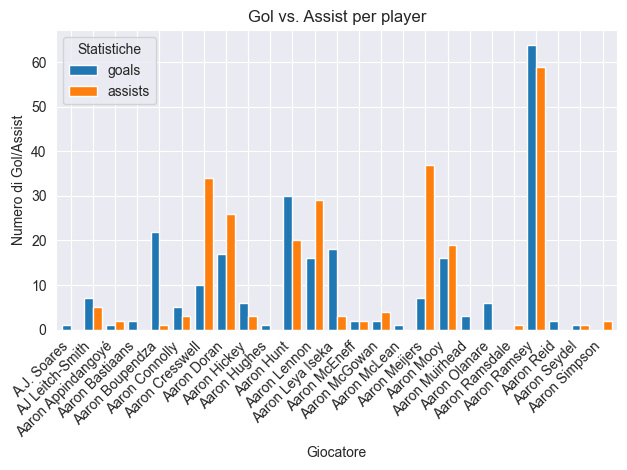

In [9]:
grouped_app = app.groupby('player_name')[['goals', 'assists']].sum()
grouped_app = grouped_app [(grouped_app['goals'] > 0) | (grouped_app['assists'] > 0)]
grouped_app = grouped_app.head(25)

# Grafico a barre (Rappresenta dati disctreti ogni barra rappresenta un giocatore
plt.figure(figsize=(10, 6))
grouped_app.plot(kind='bar', width=0.8)
plt.title('Gol vs. Assist per player')
plt.xlabel('Giocatore')
plt.ylabel('Numero di Gol/Assist')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Statistiche')
plt.tight_layout()
plt.show()

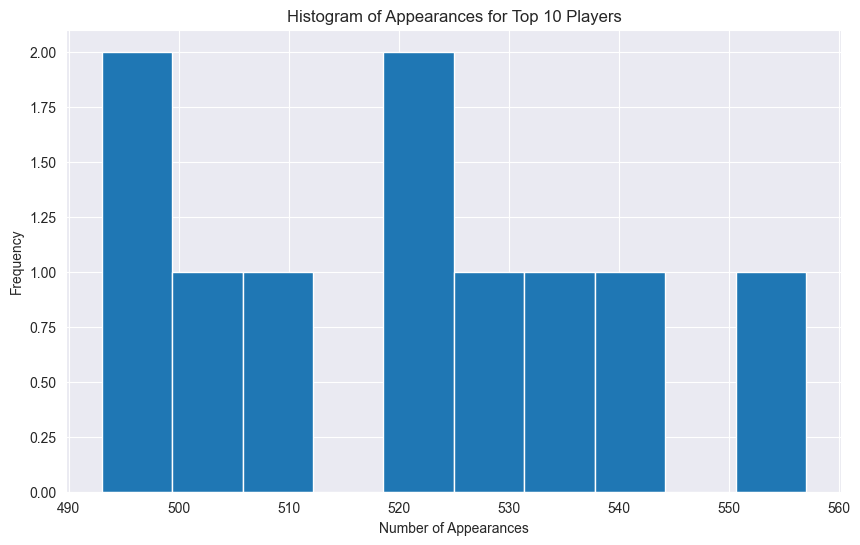

In [10]:
#Istogramma dei 10 giocatori con più apparizioni (controllare frequenza tra 0 e 2)
# Calcola il numero di apparizioni per giocatore
appearances_per_player = app.groupby('player_id')['appearance_id'].count()

# Ordina i giocatori per numero di apparizioni in ordine decrescente
top_players = appearances_per_player.sort_values(ascending=False)

# Seleziona i primi 10 giocatori
top_10_players = top_players.head(10)

# Crea l'istogramma utilizzando plot(kind='hist')
plt.figure(figsize=(10, 6))
top_10_players.plot(kind='hist', bins=10)
plt.xlabel('Number of Appearances')
plt.ylabel('Frequency')
plt.title('Histogram of Appearances for Top 10 Players')
plt.show()


<Figure size 1000x600 with 0 Axes>

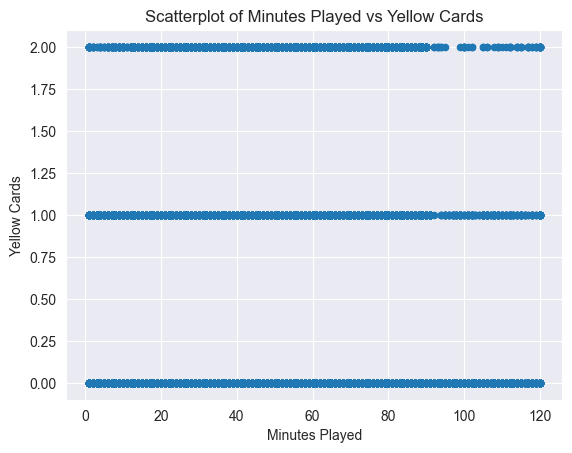

In [42]:
#Scatterplot tra minuti giocati e cartellini gialli
# Seleziona solo le colonne di interesse
subset_data = app[['minutes_played', 'yellow_cards']]

# Rimuovi le righe con valori nulli
subset_data = subset_data.dropna()

# Crea il grafico scatterplot utilizzando plot(kind='scatter')
plt.figure(figsize=(10, 6))
subset_data.plot(x='minutes_played', y='yellow_cards', kind='scatter')
plt.xlabel('Minutes Played')
plt.ylabel('Yellow Cards')
plt.title('Scatterplot of Minutes Played vs Yellow Cards')
plt.show()


In [70]:
# Calcola il numero totale di cartellini per ogni squadra
total_cards_per_team = app.groupby('player_current_club_id')[['yellow_cards', 'red_cards']].sum().reset_index()
total_cards_per_team['total_cards'] = total_cards_per_team['yellow_cards'] + total_cards_per_team['red_cards']

df['merged_col'] = df['player_current_club_id'].astype(str) + df['club_id'].astype(str)

# Unisci i dati delle due tabelle sulla base dell'ID della squadra
merged_data = pd.merge(total_cards_per_team, clubs, on='player_current_club_id')
 # Assuming df is your DataFrame and 'col1' and 'col2' are the columns you want to merge
 

# Seleziona solo le prime 25 squadre per visualizzazione
top_25_teams = merged_data.head(25)

# Crea l'istogramma
plt.figure(figsize=(12, 6))
plt.bar(top_25_teams['team_name'], top_25_teams['total_cards'], color='black')
plt.xlabel('Team Name')
plt.ylabel('Total Cards')
plt.title('Total Cards per Team')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


#todo fare associazione di id e nome squadra(prendere indicativamente 25 sq)

Index(['appearance_id', 'game_id', 'player_id', 'player_club_id',
       'player_current_club_id', 'date', 'player_name', 'competition_id',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played'],
      dtype='object')


KeyError: 'player_current_club_id'